In [1]:
! pip install opencv-python


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras import layers, models


In [7]:

# Define the path to your dataset
data_dir = "C:/Users/Kavitha/Desktop/CAPSTONE PROJECT/Assignment/task2/Dataset_BUSI_with_GT"
categories = ["Benign", "malignant", "normal"]

# Initialize lists to store images and masks
images = []
masks = []

# Define the target size for resizing (e.g., 128x128)
target_size = (128, 128)

# Iterate through each category
for category in categories:
    path = os.path.join(data_dir, category)
    count = 0  # To keep track of the number of images processed per category
    
    # Loop through the images in the category folder
    for img in os.listdir(path):
        if img.endswith(".png"):  # Ensure only image files are processed
            # Load the image (the original image)
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Assuming the mask has the same name as the image but stored differently
            mask_name = img.replace(".png", "_mask.png")  # Modify based on your mask naming convention
            mask_path = os.path.join(path, mask_name)
            mask_array = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            # Check if the images are loaded properly
            if img_array is not None and mask_array is not None:
                # Resize both image and mask to target size
                img_resized = cv2.resize(img_array, target_size)
                mask_resized = cv2.resize(mask_array, target_size)

                # Normalize the images and masks to [0, 1]
                img_normalized = img_resized / 255.0
                mask_normalized = mask_resized / 255.0

                # Append the normalized images and masks to the lists
                images.append(img_normalized)
                masks.append(mask_normalized)

# Convert lists to NumPy arrays
images = np.array(images).reshape(-1, target_size[0], target_size[1], 1)  # For grayscale
masks = np.array(masks).reshape(-1, target_size[0], target_size[1], 1)

##  Define the U-Net Model

In [10]:
def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(3 , (1, 1), activation='softmax')(c9)  # For multi-class segmentation

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

## Compile the Model


In [11]:
model = unet_model(input_size=(128, 128, 1))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Train the Model


In [12]:
epochs = 10
batch_size = 16

model.fit(images, masks, epochs=epochs, batch_size=batch_size, validation_split=0.1)



Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8400 - loss: 0.5893 - val_accuracy: 1.0000 - val_loss: 0.0437
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9128 - loss: 0.2938 - val_accuracy: 1.0000 - val_loss: 0.0984
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 843ms/step - accuracy: 0.9128 - loss: 0.2702 - val_accuracy: 1.0000 - val_loss: 0.0748
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 806ms/step - accuracy: 0.9193 - loss: 0.2086 - val_accuracy: 1.0000 - val_loss: 0.0350
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9190 - loss: 0.2102 - val_accuracy: 0.9998 - val_loss: 0.0370
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9137 - loss: 0.2194 - val_accuracy: 0.9917 - val_loss: 0.0783
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9232 - loss: 0.2003 - val_accuracy: 0.9356 - val_loss: 0.1900
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9165 - loss: 0.2141 - val_accuracy: 0.9920 - val

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step


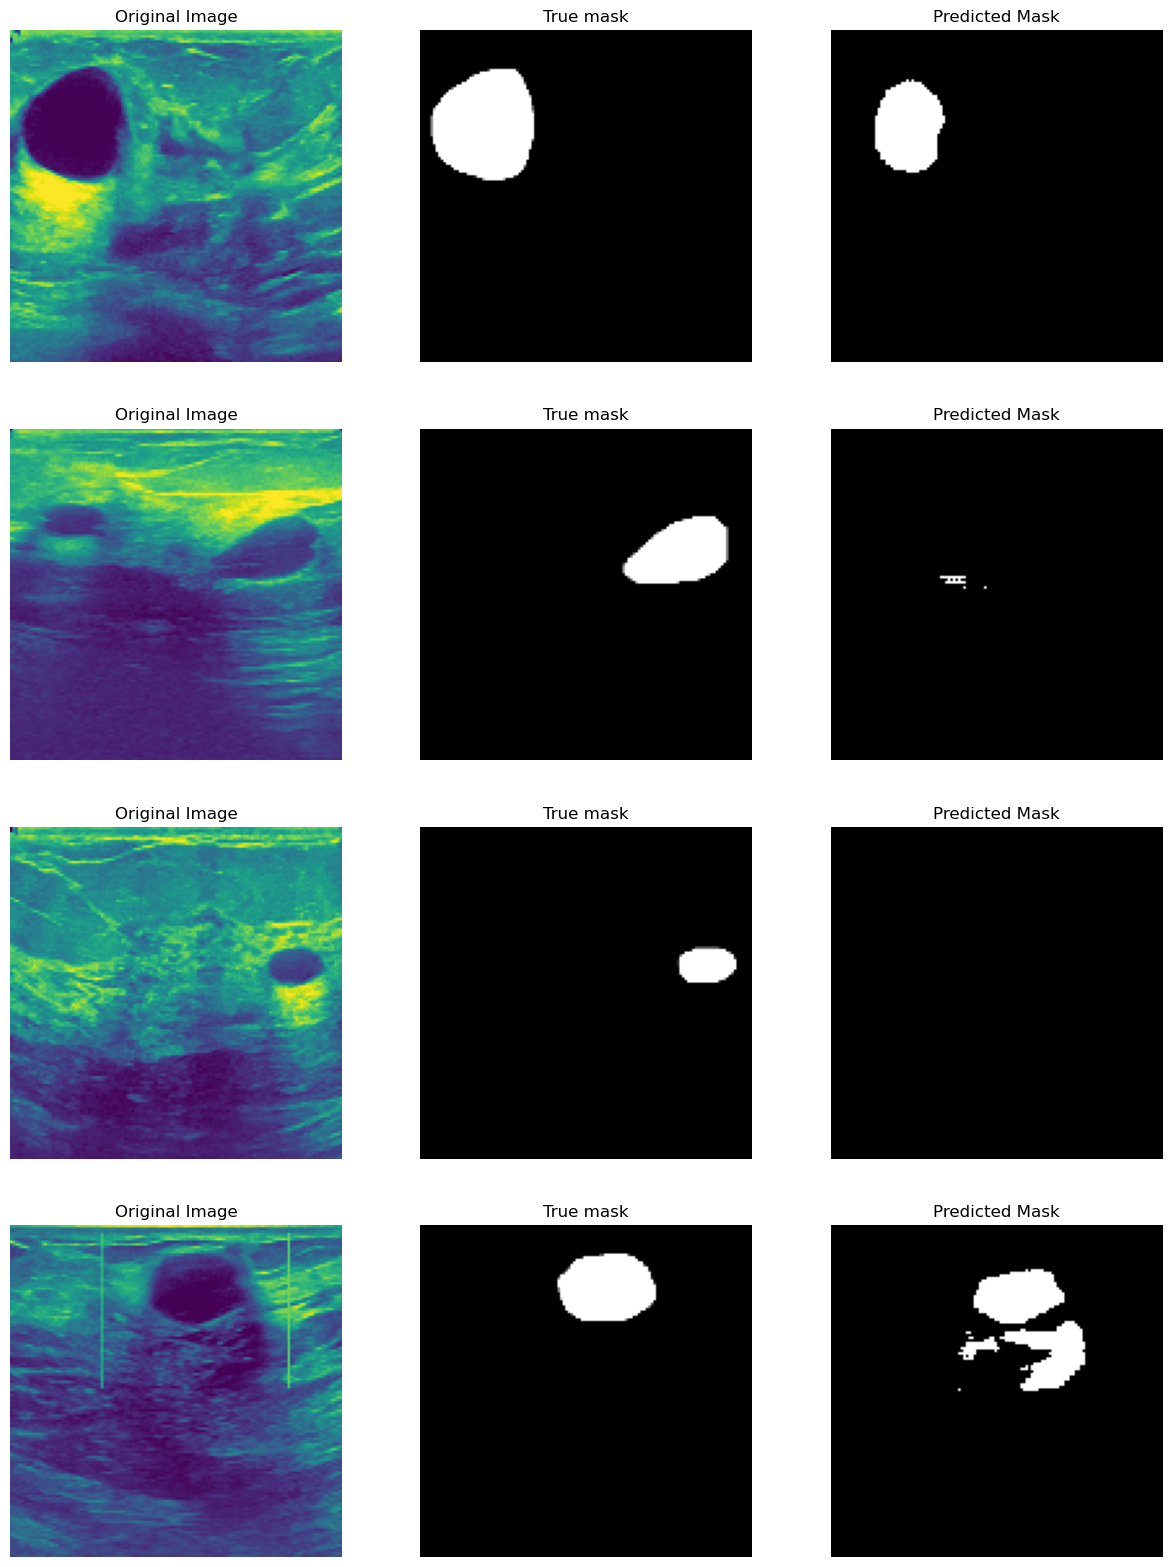

In [17]:
def visualize_predictions(images, masks, prediction,num_images=5):

    plt.figure(figsize=(15, 5 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[i])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title('True mask')
        plt.axis('off')

        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(prediction[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

    plt.show()

# Make predictions using the trained model
predicted_masks = model.predict(images)

# Process predictions: convert to class labels using argmax
predicted_masks_classes = np.argmax(predicted_masks, axis=-1)

visualize_predictions(images, masks, predicted_masks_classes)
